## 5-year split for all SMA strategies

In [1]:
from preprocess import prep_all_movavg, prep_movavg_mod
from tradesim_sma import simulate as sim_alt
from tradesim_sma_daily import simulate, sim_buy_hold_eq
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

### 1-month alt strategy

In [3]:
# ticker prep
df_xlvtick = pd.read_csv('XLV.csv')
tick_list = df_xlvtick['Ticker'].tolist()

In [5]:
df_list = prep_all_movavg(tick_list)

In [38]:
start = pd.to_datetime('01/03/00')
funds = 1000000
days=21
cycle=60

In [39]:
sma_1_fund_df1, sma_1_final_funds1 = sim_alt(funds, df_list, start, days, cycle)

In [9]:
start = pd.to_datetime('01/10/05')

In [10]:
sma_1_fund_df2, sma_1_final_funds2 = sim_alt(funds, df_list, start, days, cycle)

In [11]:
start = pd.to_datetime('01/13/10')

In [12]:
sma_1_fund_df3, sma_1_final_funds3 = sim_alt(funds, df_list, start, days, cycle)

In [13]:
start = pd.to_datetime('01/16/15')

In [14]:
sma_1_fund_df4, sma_1_final_funds4 = sim_alt(funds, df_list, start, days, cycle)

### 2-month alt strategy

In [40]:
start = pd.to_datetime('01/03/00')
funds = 1000000
days=42
cycle=30

In [41]:
sma_2_fund_df1, sma_2_final_funds1 = sim_alt(funds, df_list, start, days, cycle)

In [43]:
start = pd.to_datetime('01/10/05')

In [44]:
sma_2_fund_df2, sma_2_final_funds2 = sim_alt(funds, df_list, start, days, cycle)

In [45]:
start = pd.to_datetime('01/13/10')

In [46]:
sma_2_fund_df3, sma_2_final_funds3 = sim_alt(funds, df_list, start, days, cycle)

In [47]:
start = pd.to_datetime('01/16/15')

In [48]:
sma_2_fund_df4, sma_2_final_funds4 = sim_alt(funds, df_list, start, days, cycle)

### 6-month alt strategy

In [58]:
start = pd.to_datetime('01/03/00')
funds = 1000000
days=126
cycle=10

In [59]:
sma_6_fund_df1, sma_6_final_funds1 = sim_alt(funds, df_list, start, days, cycle)

In [60]:
start = pd.to_datetime('01/10/05')

In [61]:
sma_6_fund_df2, sma_6_final_funds2 = sim_alt(funds, df_list, start, days, cycle)

In [62]:
start = pd.to_datetime('01/13/10')

In [63]:
sma_6_fund_df3, sma_6_final_funds3 = sim_alt(funds, df_list, start, days, cycle)

In [64]:
start = pd.to_datetime('01/16/15')

In [65]:
sma_6_fund_df4, sma_6_final_funds4 = sim_alt(funds, df_list, start, days, cycle)

In [66]:
sma_6_fund_df3

,date,curr_fund,num_stocks
0,2010-01-13,1000000,0
1,2010-07-15,1007456.344629,53
2,2011-01-12,1219573.275689,32
3,2011-07-14,1427810.972806,51
4,2012-01-12,1386544.818434,57
5,2012-07-13,1584466.092149,21
6,2013-01-15,1735541.922454,45
7,2013-07-17,2067773.461614,44
8,2014-01-15,2530498.795651,54
9,2014-07-17,2659503.652888,52


### SMA daily strategy

In [16]:
df_dict = prep_movavg_mod(tick_list)
start = pd.to_datetime('01/03/00')
end = pd.to_datetime('01/10/05')

In [17]:
sma_funds1, sma_current_val1, sma_fund_df1 = simulate(funds, df_dict, start, end)

In [18]:
start = pd.to_datetime('01/10/05')
end = pd.to_datetime('01/13/10')

In [19]:
sma_funds2, sma_current_val2, sma_fund_df2 = simulate(funds, df_dict, start, end)

In [20]:
start = pd.to_datetime('01/13/10')
end = pd.to_datetime('01/16/15')

In [21]:
sma_funds3, sma_current_val3, sma_fund_df3 = simulate(funds, df_dict, start, end)

In [23]:
start = pd.to_datetime('01/16/15')
end = pd.to_datetime('01/22/20')

In [24]:
sma_funds4, sma_current_val4, sma_fund_df4 = simulate(funds, df_dict, start, end)

### XLV equal-weight strategy

In [25]:
start = pd.to_datetime('01/03/00')
end = pd.to_datetime('01/10/05')
funds1, current_val1, fund_df1 = sim_buy_hold_eq(funds, df_dict, start, end)

In [26]:
start = pd.to_datetime('01/10/05')
end = pd.to_datetime('01/13/10')
funds2, current_val2, fund_df2 = sim_buy_hold_eq(funds, df_dict, start, end)

In [27]:
start = pd.to_datetime('01/13/10')
end = pd.to_datetime('01/16/15')
funds3, current_val3, fund_df3 = sim_buy_hold_eq(funds, df_dict, start, end)

In [28]:
start = pd.to_datetime('01/16/15')
end = pd.to_datetime('01/22/20')
funds4, current_val4, fund_df4 = sim_buy_hold_eq(funds, df_dict, start, end)

## Comparison

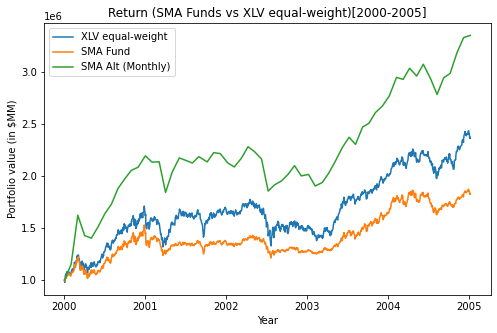

In [81]:
# Period 1 plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(8,5))
ax.set_ylabel('Portfolio value (in $MM)')
ax.set_xlabel('Year')
ax.plot(fund_df1['date'], fund_df1['curr_fund'], label='XLV equal-weight')
ax.plot(sma_fund_df1['date'], sma_fund_df1['curr_fund'], label='SMA Fund')
ax.plot(sma_1_fund_df1['date'], sma_1_fund_df1['curr_fund'], label='SMA Alt (Monthly)')
#ax.plot(sma_2_fund_df1['date'], sma_2_fund_df1['curr_fund'], label='SMA_Alt (Bi-monthly)')
#ax.plot(sma_6_fund_df1['date'], sma_6_fund_df1['curr_fund'], label='SMA_Alt (Bi-annual)')
ax.legend()
ax.set_title('Return (SMA Funds vs XLV equal-weight)[2000-2005]')
plt.savefig('SMA_5_Year_Split_Return1.png')

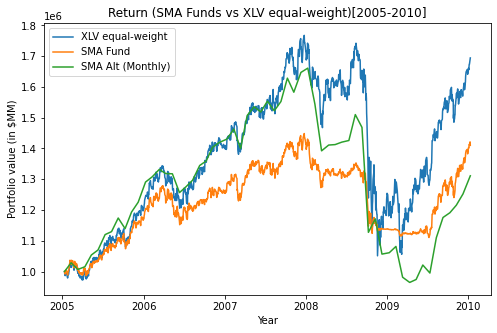

In [82]:
# Period 2 plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(8,5))
ax.set_ylabel('Portfolio value (in $MM)')
ax.set_xlabel('Year')
ax.plot(fund_df2['date'], fund_df2['curr_fund'], label='XLV equal-weight')
ax.plot(sma_fund_df2['date'], sma_fund_df2['curr_fund'], label='SMA Fund')
ax.plot(sma_1_fund_df2['date'], sma_1_fund_df2['curr_fund'], label='SMA Alt (Monthly)')
#ax.plot(sma_2_fund_df2['date'], sma_2_fund_df2['curr_fund'], label='SMA_Alt (Bi-monthly)')
#ax.plot(sma_6_fund_df2['date'], sma_6_fund_df2['curr_fund'], label='SMA_Alt (Bi-annual)')
ax.legend()
ax.set_title('Return (SMA Funds vs XLV equal-weight)[2005-2010]')
plt.savefig('SMA_5_Year_Split_Return2.png')

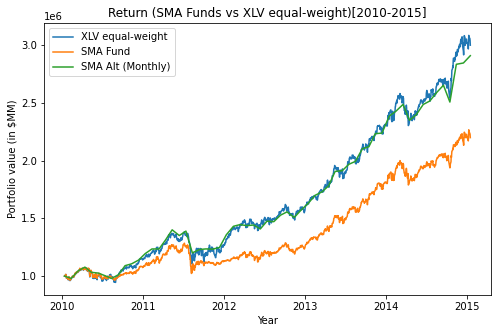

In [83]:
# Period 3 plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(8,5))
ax.set_ylabel('Portfolio value (in $MM)')
ax.set_xlabel('Year')
ax.plot(fund_df3['date'], fund_df3['curr_fund'], label='XLV equal-weight')
ax.plot(sma_fund_df3['date'], sma_fund_df3['curr_fund'], label='SMA Fund')
ax.plot(sma_1_fund_df3['date'], sma_1_fund_df3['curr_fund'], label='SMA Alt (Monthly)')
#ax.plot(sma_2_fund_df3['date'], sma_2_fund_df3['curr_fund'], label='SMA_Alt (Bi-monthly)')
#ax.plot(sma_6_fund_df3['date'], sma_6_fund_df3['curr_fund'], label='SMA_Alt (Bi-annual)')
ax.legend()
ax.set_title('Return (SMA Funds vs XLV equal-weight)[2010-2015]')
plt.savefig('SMA_5_Year_Split_Return3.png')

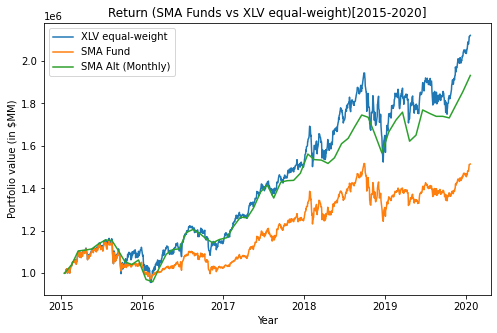

In [84]:
# Period 4 plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(8,5))
ax.set_ylabel('Portfolio value (in $MM)')
ax.set_xlabel('Year')
ax.plot(fund_df4['date'], fund_df4['curr_fund'], label='XLV equal-weight')
ax.plot(sma_fund_df4['date'], sma_fund_df4['curr_fund'], label='SMA Fund')
ax.plot(sma_1_fund_df4['date'], sma_1_fund_df4['curr_fund'], label='SMA Alt (Monthly)')
#ax.plot(sma_2_fund_df4['date'], sma_2_fund_df4['curr_fund'], label='SMA_Alt (Bi-monthly)')
#ax.plot(sma_6_fund_df4['date'], sma_6_fund_df4['curr_fund'], label='SMA_Alt (Bi-annual)')
ax.legend()
ax.set_title('Return (SMA Funds vs XLV equal-weight)[2015-2020]')
plt.savefig('SMA_5_Year_Split_Return4.png')